### Objective of the problem

The objective of the problem is to predict the values of “views” variable from the given features of the Test data.

### Description of attributes

The data given is related to various trending YouTube videos. Following are the variables involved:
- Video_id:- ID of the uploaded video
- Publish_date:- Date when it was published
- Trending_date:- Last date it was trending
- Category_id:- Category it belong 
- Channel_Title:- Name of the title
- Subscriber:- Number of people who subscribed the channel
- Title:- Title of the video uploaded
- Tags:-Tags appeared with the video
- Description:-Description of the video
- Trend_day_count:-Number of days video was trending
- Tag_count:-Number of tags in the video
- Trend_tag_count:- Number of tags trending among total tag
- Tag appeared in title:-Does tag appeared in video title
- Views:- Number of total views for the video


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#Read both test and train csv file
df_train = pd.read_csv("youtube_train.csv", na_values=' ')
df_train.shape

(4533, 19)

### Analyze Data

In [3]:
df_train.describe()

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike
count,4.502000e+03,4533.000000,4532.000000,4532.000000,3084.000000,4.533000e+03,4533.000000
mean,3.571822e+06,7.535407,17.969109,6.199250,164071.698768,9.769338e+03,5855.016325
std,2.420216e+07,65.999030,67.560453,147.056849,80581.581656,1.917311e+04,4830.100770
min,0.000000e+00,0.000000,0.000000,1.000000,23008.000000,0.000000e+00,0.000000
25%,2.428800e+05,4.000000,12.000000,2.000000,95040.750000,0.000000e+00,0.000000
50%,1.195770e+06,7.000000,17.000000,4.000000,162631.500000,1.038200e+04,5442.000000
75%,3.766915e+06,10.000000,21.000000,6.000000,235984.250000,1.500100e+04,10138.000000
max,1.576229e+09,4444.000000,3225.000000,9903.000000,299877.000000,1.213628e+06,14916.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               4533 non-null   object 
 1   publish_date           4531 non-null   object 
 2   trending_date          4531 non-null   object 
 3   category_id            4526 non-null   object 
 4   channel_title          4530 non-null   object 
 5   subscriber             4502 non-null   float64
 6   title                  4531 non-null   object 
 7   tags                   4325 non-null   object 
 8   description            4439 non-null   object 
 9   Trend_day_count        4533 non-null   int64  
 10  Tag_count              4532 non-null   float64
 11  Trend_tag_count        4532 non-null   float64
 12  comment_count          3084 non-null   float64
 13  comment_disabled       4533 non-null   bool   
 14  like dislike disabled  4533 non-null   bool   
 15  like

In [5]:
print(df_train.isnull().sum())

Video_id                    0
publish_date                2
trending_date               2
category_id                 7
channel_title               3
subscriber                 31
title                       2
tags                      208
description                94
Trend_day_count             0
Tag_count                   1
Trend_tag_count             1
comment_count            1449
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
dtype: int64


### Feature Engineering

In [6]:
#Convert object columns to numeric and treat incorrect values
df_train = df_train[df_train.views!='#VALUE!']
df_train = df_train.replace(' ', np.nan, regex=True)
df_train['category_id'] = df_train['category_id'].replace('“24', '24', regex=True)
df_train['views'] = pd.to_numeric(df_train['views'])
df_train['comment_count'] = pd.to_numeric(df_train['comment_count'])
df_train['Trend_tag_count'] = pd.to_numeric(df_train['Trend_tag_count'], errors='coerce')
df_train=df_train.dropna(subset=['publish_date','trending_date'], axis=0)

df_train.info()
df_temp = pd.DataFrame(df_train) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4528 entries, 0 to 4532
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               4528 non-null   object 
 1   publish_date           4528 non-null   object 
 2   trending_date          4528 non-null   object 
 3   category_id            4521 non-null   object 
 4   channel_title          1883 non-null   object 
 5   subscriber             4498 non-null   float64
 6   title                  11 non-null     object 
 7   tags                   326 non-null    object 
 8   description            19 non-null     object 
 9   Trend_day_count        4528 non-null   int64  
 10  Tag_count              4527 non-null   float64
 11  Trend_tag_count        4527 non-null   float64
 12  comment_count          3080 non-null   float64
 13  comment_disabled       4528 non-null   bool   
 14  like dislike disabled  4528 non-null   bool   
 15  like

In [7]:
df_train['Trend_tag_count'].fillna(df_train['Trend_tag_count'].median(), inplace=True)
df_train['comment_count'].fillna(df_train['comment_count'].median(), inplace=True)
df_train['subscriber'].fillna(df_train['subscriber'].median(), inplace=True)
df_train['Tag_count'].fillna(df_train['Tag_count'].median(), inplace=True)

In [8]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
df_train['trending_date']= pd.to_datetime(df_train['trending_date']) 
df_train['publish_date']= pd.to_datetime(df_train['publish_date'])
df_train['diff_days'] = df_train['trending_date'] - df_train['publish_date']
df_train['diff_days']=df_train['diff_days']/np.timedelta64(1,'D')


In [9]:
#Splitting date feature into 3 seperate features day, month and year
#we intend to check if any of these variables are statistcally significant to the dependent variable
df_train['publish_year']=df_train['publish_date'].dt.year
df_train['publish_month']=df_train['publish_date'].dt.month
df_train['publish_day']=df_train['publish_date'].dt.day

df_train['trending_year']=df_train['trending_date'].dt.year
df_train['trending_month']=df_train['trending_date'].dt.month
df_train['trending_day']=df_train['trending_date'].dt.day

In [10]:
#Check null values
print(df_train.isnull().sum())

Video_id                    0
publish_date                0
trending_date               0
category_id                 7
channel_title            2645
subscriber                  0
title                    4517
tags                     4202
description              4509
Trend_day_count             0
Tag_count                   0
Trend_tag_count             0
comment_count               0
comment_disabled            0
like dislike disabled       0
likes                       0
dislike                     0
tag appered in title        1
views                       0
diff_days                   0
publish_year                0
publish_month               0
publish_day                 0
trending_year               0
trending_month              0
trending_day                0
dtype: int64


In [11]:
#Handle categorical variable using dummmies
cat_vars =['category_id','tag appered in title']
for var in cat_vars:
    cat_list = 'var'+'_'+var
    
    cat_list = pd.get_dummies(df_train[var],prefix=var,drop_first =True)
    data1 = df_train.join(cat_list)
    
    df_train=data1
    
df_train.head()

,Video_id,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,...,category_id_226,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43,tag appered in title_True
0,HDR9SQc79,2017-11-13,2017-11-20,22,CaseyNeistat,9086142.0,NaN,NaN,NaN,6,...,0,0,0,0,0,0,0,0,0,0
1,KNH52UF?48,2017-11-13,2017-11-20,24,LastWeekTonight,5937292.0,NaN,NaN,NaN,1,...,0,0,1,0,0,0,0,0,0,0
2,QTW28IRG36,2017-12-11,2017-11-20,23,NaN,4191209.0,NaN,NaN,NaN,10,...,0,1,0,0,0,0,0,0,0,1
3,MGL76WI]26,2017-11-13,2017-11-20,24,NaN,13186408.0,NaN,NaN,NaN,12,...,0,0,1,0,0,0,0,0,0,1
4,TWP93KXT70,2017-12-11,2017-11-19,224,nigahiga,20563106.0,NaN,NaN,NaN,11,...,0,0,0,0,0,0,0,0,0,1


### Data Visualisation

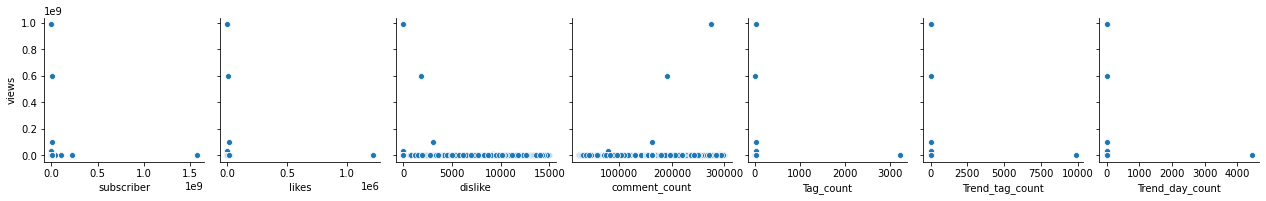

In [12]:
#Visualisation of relationship between dependent and independent variables
sns.pairplot(data=df_train,x_vars=["subscriber","likes","dislike","comment_count","Tag_count","Trend_tag_count","Trend_day_count"],y_vars="views",
            kind='scatter')

#### From the above scatter plot, we can conclude that the predictors are not showing a linear relationship with the target variable and hence Linear regression algorithm will not work in this case.

In [13]:
#Find Correlation
correlation_matrix = df_temp.corr().round(2)
correlation_matrix

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,views,diff_days,publish_year,publish_month,publish_day,trending_year,trending_month,trending_day
subscriber,1.00,-0.00,-0.00,-0.00,-0.01,0.01,0.02,-0.01,-0.02,0.01,-0.01,-0.00,0.02,-0.00,-0.03,0.03,-0.00
Trend_day_count,-0.00,1.00,-0.00,0.00,-0.01,0.01,-0.01,0.00,0.01,-0.00,-0.00,-0.01,0.02,0.01,-0.02,0.02,0.02
Tag_count,-0.00,-0.00,1.00,0.00,0.01,-0.01,0.04,-0.01,-0.03,-0.00,0.00,-0.01,0.02,-0.00,-0.03,0.03,0.01
Trend_tag_count,-0.00,0.00,0.00,1.00,-0.00,-0.02,-0.01,-0.00,-0.01,-0.00,-0.00,-0.01,0.01,-0.01,-0.02,0.02,-0.00
comment_count,-0.01,-0.01,0.01,-0.00,1.00,0.01,-0.01,-0.01,-0.01,0.03,0.01,-0.00,-0.00,-0.02,0.00,0.01,-0.00
comment_disabled,0.01,0.01,-0.01,-0.02,0.01,1.00,-0.01,0.02,0.02,0.02,0.01,-0.01,0.01,0.01,-0.02,0.02,-0.02
like dislike disabled,0.02,-0.01,0.04,-0.01,-0.01,-0.01,1.00,-0.30,-0.71,0.01,0.01,-0.02,0.03,-0.01,-0.01,0.03,0.01
likes,-0.01,0.00,-0.01,-0.00,-0.01,0.02,-0.30,1.00,0.34,-0.01,-0.01,-0.00,-0.00,0.00,-0.02,0.01,-0.00
dislike,-0.02,0.01,-0.03,-0.01,-0.01,0.02,-0.71,0.34,1.00,-0.02,-0.02,0.02,-0.03,0.01,-0.00,-0.01,-0.02
views,0.01,-0.00,-0.00,-0.00,0.03,0.02,0.01,-0.01,-0.02,1.00,0.11,-0.09,-0.00,0.01,-0.01,0.03,-0.01


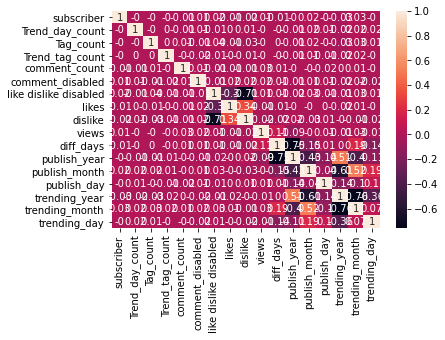

In [14]:
sns.heatmap(data=correlation_matrix, annot=True)

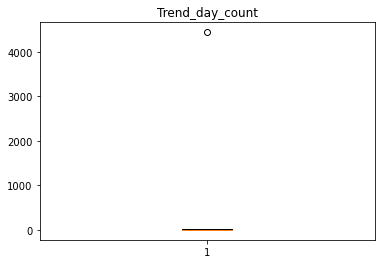

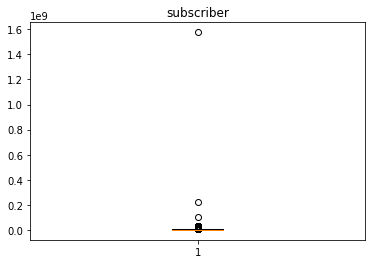

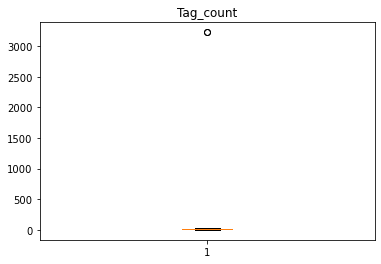

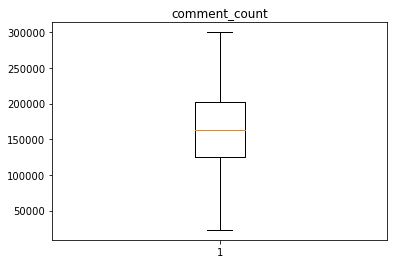

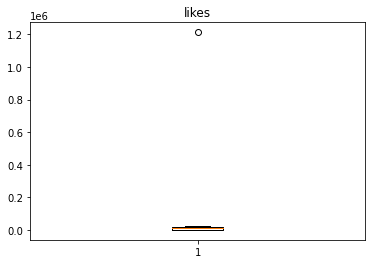

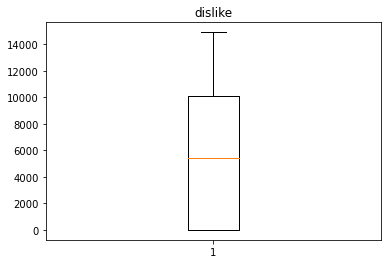

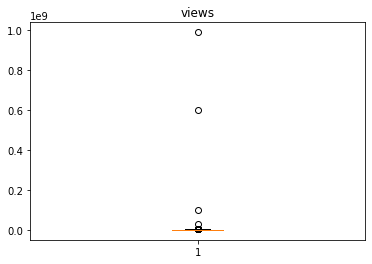

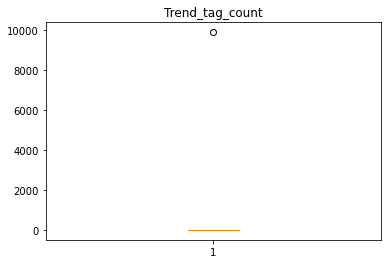

In [15]:
new_df=df_train[['Trend_day_count', 'subscriber', 'Tag_count','comment_count','likes','dislike','views','Trend_tag_count']].copy()

for col in new_df.columns:
    plt.boxplot(new_df[col])
    plt.title(col)
    plt.show()

In [16]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    low_range = Q1 - (1.5 * IQR)
    up_range = Q3 +(1.5 * IQR)
    return low_range,up_range

In [17]:
lowerbd ,upperbd = outlier_treatment(df_train.subscriber)
df_train.drop(df_train[(df_train.subscriber > upperbd)|(df_train.subscriber < lowerbd)].index,inplace=True)

In [18]:
lowerbd ,upperbd = outlier_treatment(df_train.Trend_day_count)
df_train.drop(df_train[(df_train.Trend_day_count > upperbd)|(df_train.Trend_day_count < lowerbd)].index,inplace=True)

In [19]:
lowerbd ,upperbd = outlier_treatment(df_train.Tag_count)
df_train.drop(df_train[(df_train.Tag_count > upperbd)|(df_train.Tag_count < lowerbd)].index,inplace=True)

In [20]:
lowerbd ,upperbd = outlier_treatment(df_train.comment_count)
df_train.drop(df_train[(df_train.comment_count > upperbd)|(df_train.comment_count < lowerbd)].index,inplace=True)

In [21]:
lowerbd ,upperbd = outlier_treatment(df_train.likes)
df_train.drop(df_train[(df_train.likes > upperbd)|(df_train.likes < lowerbd)].index,inplace=True)

In [22]:
lowerbd ,upperbd = outlier_treatment(df_train.dislike)
df_train.drop(df_train[(df_train.dislike> upperbd)|(df_train.dislike < lowerbd)].index,inplace=True)

In [23]:
lowerbd ,upperbd = outlier_treatment(df_train.views)
df_train.drop(df_train[(df_train.views> upperbd)|(df_train.views < lowerbd)].index,inplace=True)

In [24]:
lowerbd ,upperbd = outlier_treatment(df_train.Trend_tag_count)
df_train.drop(df_train[(df_train.Trend_tag_count> upperbd)|(df_train.Trend_tag_count < lowerbd)].index,inplace=True)

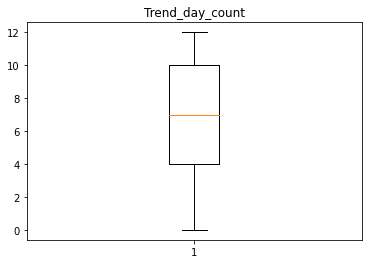

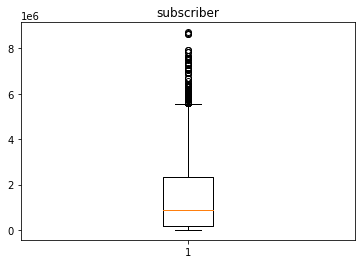

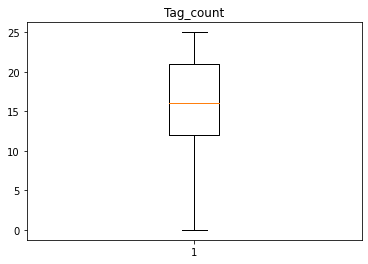

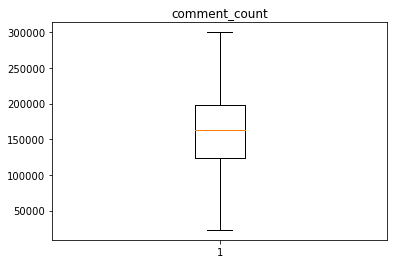

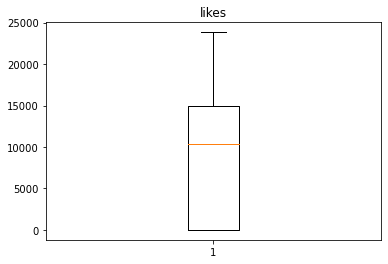

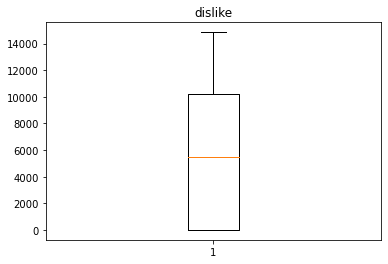

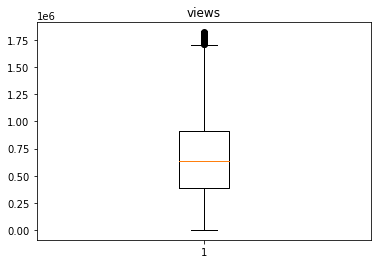

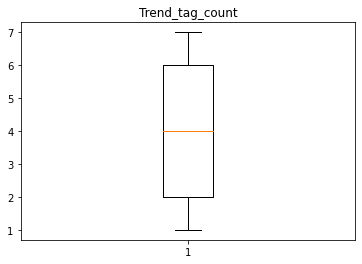

In [25]:
new_df=df_train[['Trend_day_count', 'subscriber', 'Tag_count','comment_count','likes','dislike','views','Trend_tag_count']].copy()

for col in new_df.columns:
    plt.boxplot(new_df[col])
    plt.title(col)
    plt.show()

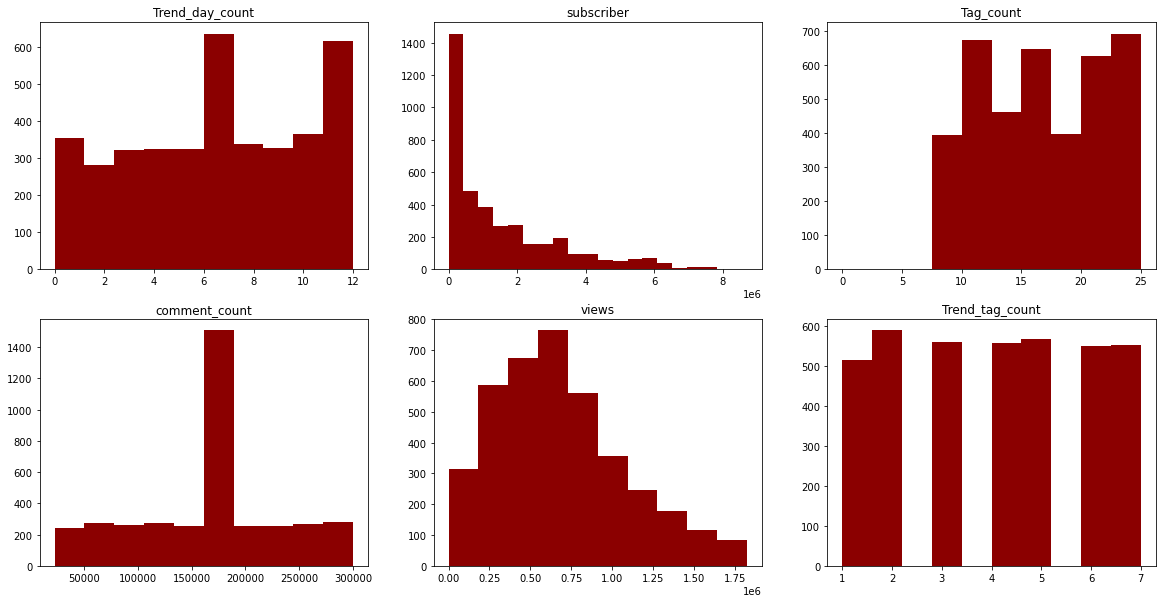

In [26]:
plt.figure(figsize=(20,10))

plt.subplot(231)
plt.hist(x="Trend_day_count",data=df_train, bins=10,color='darkred')
plt.title('Trend_day_count')

plt.subplot(232)
plt.hist(x="subscriber",data=df_train, bins=20,color='darkred')
plt.title('subscriber')

plt.subplot(233)
plt.hist(x="Tag_count",data=df_train, bins=10,color='darkred')
plt.title('Tag_count')

plt.subplot(234)
plt.hist(x="comment_count",data=df_train, bins=10, color='darkred')
plt.title('comment_count')

plt.subplot(235)
plt.hist(x="views", data= df_train, bins=10, color='darkred')
plt.title('views')

plt.subplot(236)
plt.hist(x="Trend_tag_count", data=df_train, bins=10, color='darkred')
plt.title('Trend_tag_count')

plt.show()

In [27]:
df_train.isnull().sum()

Video_id                        0
publish_date                    0
trending_date                   0
category_id                     6
channel_title                2354
subscriber                      0
title                        3874
tags                         3600
description                  3865
Trend_day_count                 0
Tag_count                       0
Trend_tag_count                 0
comment_count                   0
comment_disabled                0
like dislike disabled           0
likes                           0
dislike                         0
tag appered in title            0
views                           0
diff_days                       0
publish_year                    0
publish_month                   0
publish_day                     0
trending_year                   0
trending_month                  0
trending_day                    0
category_id_10                  0
category_id_117                 0
category_id_122                 0
category_id_15

In [28]:
df_train= df_train.drop(["Video_id","category_id","channel_title","title","tags","publish_date",'trending_date','description','comment_disabled','like dislike disabled','tag appered in title'],axis=1)

In [29]:
df = df_train

In [30]:
df_train.isnull().sum()

subscriber                   0
Trend_day_count              0
Tag_count                    0
Trend_tag_count              0
comment_count                0
likes                        0
dislike                      0
views                        0
diff_days                    0
publish_year                 0
publish_month                0
publish_day                  0
trending_year                0
trending_month               0
trending_day                 0
category_id_10               0
category_id_117              0
category_id_122              0
category_id_15               0
category_id_17               0
category_id_19               0
category_id_2                0
category_id_20               0
category_id_210              0
category_id_22               0
category_id_2225             0
category_id_224              0
category_id_226              0
category_id_23               0
category_id_24               0
category_id_25               0
category_id_26               0
category

In [31]:
df.isnull().sum()

subscriber                   0
Trend_day_count              0
Tag_count                    0
Trend_tag_count              0
comment_count                0
likes                        0
dislike                      0
views                        0
diff_days                    0
publish_year                 0
publish_month                0
publish_day                  0
trending_year                0
trending_month               0
trending_day                 0
category_id_10               0
category_id_117              0
category_id_122              0
category_id_15               0
category_id_17               0
category_id_19               0
category_id_2                0
category_id_20               0
category_id_210              0
category_id_22               0
category_id_2225             0
category_id_224              0
category_id_226              0
category_id_23               0
category_id_24               0
category_id_25               0
category_id_26               0
category

In [32]:
df_train= df_train.drop(["category_id_226","category_id_122","category_id_2225","category_id_224","category_id_43","category_id_210"],axis=1)

In [33]:
y = df['views']

In [34]:
X = df.drop('views',axis=1)
X

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,diff_days,publish_year,publish_month,...,category_id_226,category_id_23,category_id_24,category_id_25,category_id_26,category_id_27,category_id_28,category_id_29,category_id_43,tag appered in title_True
1,5937292.0,1,23.0,1.0,116266.0,5761,3044,7.0,2017,11,...,0,0,1,0,0,0,0,0,0,0
2,4191209.0,10,22.0,3.0,257850.0,0,0,-21.0,2017,12,...,0,1,0,0,0,0,0,0,0,1
5,4652602.0,10,9.0,1.0,198248.0,8619,3697,7.0,2017,11,...,0,0,0,0,0,0,1,0,0,1
6,5292034.0,4,17.0,5.0,162537.0,9951,937,-23.0,2017,12,...,0,0,1,0,0,0,0,0,0,0
8,2453494.0,8,20.0,1.0,214583.0,12126,7855,2.0,2017,11,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4527,1165807.0,3,21.0,2.0,42379.0,6338,1898,30.0,2018,4,...,0,0,1,0,0,0,0,0,0,0
4529,5292034.0,3,8.0,1.0,94868.0,0,0,30.0,2018,4,...,0,0,1,0,0,0,0,0,0,1
4530,1568812.0,5,22.0,1.0,241644.0,7795,6940,30.0,2018,4,...,0,0,1,0,0,0,0,0,0,1
4531,1607518.0,7,15.0,2.0,162537.0,11795,10139,30.0,2018,4,...,0,0,0,0,0,1,0,0,0,1


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.33,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2601, 36)
(1282, 36)
(2601,)
(1282,)


### Applying Decision tree Algorithm

In [36]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(criterion='mse', random_state = 10)  

# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=10)

In [37]:
Y_predict=regressor.predict(X_test)

In [38]:
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print('R sqaure',metrics.r2_score(Y_test,Y_predict))

Root Mean Squared Error: 116325.89707396708
R sqaure 0.9142644580759034


### Applying Random Forest Algorithm

In [39]:
# import the regressor 
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
regressor = RandomForestRegressor(n_estimators=25, random_state=10)

# fit the regressor with X and Y data 
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=25, random_state=10)

In [40]:
Y_predict = regressor.predict(X_test)

In [41]:
from sklearn import metrics

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predict)))
print('R sqaure',metrics.r2_score(Y_test,Y_predict))

Root Mean Squared Error: 85500.68154738305
R sqaure 0.9536822739442077


### Applying Ensemble Technique - Gradient Boosting

In [42]:
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error

In [43]:
reg = ensemble.GradientBoostingRegressor()
reg.fit(X_train, Y_train)

GradientBoostingRegressor()

In [44]:
Y_predict = reg.predict(X_test)

In [45]:
from sklearn import metrics
print('R Squared:',metrics.r2_score(Y_test,Y_predict))
print('Mean Abs Error:',metrics.mean_absolute_error(Y_test,Y_predict))
print('Mean Sqr Error:',metrics.mean_squared_error(Y_test,Y_predict))
print('Root Mean Sqr Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

R Squared: 0.9646530912944388
Mean Abs Error: 37896.774272869596
Mean Sqr Error: 5578833005.778754
Root Mean Sqr Error: 74691.58591018639


### Applying XGBoosting Algorithm

In [46]:
import xgboost as xgb

In [47]:
xg_reg = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=1000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

xg_reg.fit(X_train,Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.07, max_delta_step=0, max_depth=3,
             min_child_weight=1.5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
             subsample=0.6, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [48]:
Y_predict = xg_reg.predict(X_test)

In [49]:
print('R Squared:',metrics.r2_score(Y_test,Y_predict))
print('Mean Abs Error:',metrics.mean_absolute_error(Y_test,Y_predict))
print('Mean Sqr Error:',metrics.mean_squared_error(Y_test,Y_predict))
print('Root Mean Sqr Error:',np.sqrt(metrics.mean_squared_error(Y_test,Y_predict)))

R Squared: 0.9628118115268224
Mean Abs Error: 36432.53574889089
Mean Sqr Error: 5869443775.337635
Root Mean Sqr Error: 76612.2951969045
